# IRIS_SVM_R

Package e1071 which contains the svm function (remember to install the package if you haven't already).

In [1]:
library(e1071)
set.seed(10111)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [2]:
library(datasets)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
subset(iris, Species == "versicolor")[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor


In [4]:
subset(iris, Species == "virginica")[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica


In [5]:
subset(iris, Species == "setosa")[1:5,]



flower_data <- subset(iris)[1:40,c(1,2,5)]
levels(flower_data[,3])
x = matrix(rnorm(40), 20, 2)
#x = matrix(flower_data)
y = rep(c(-1, 1), c(10, 10))


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [7]:
x[y == 1,] = x[y == 1,] + 1

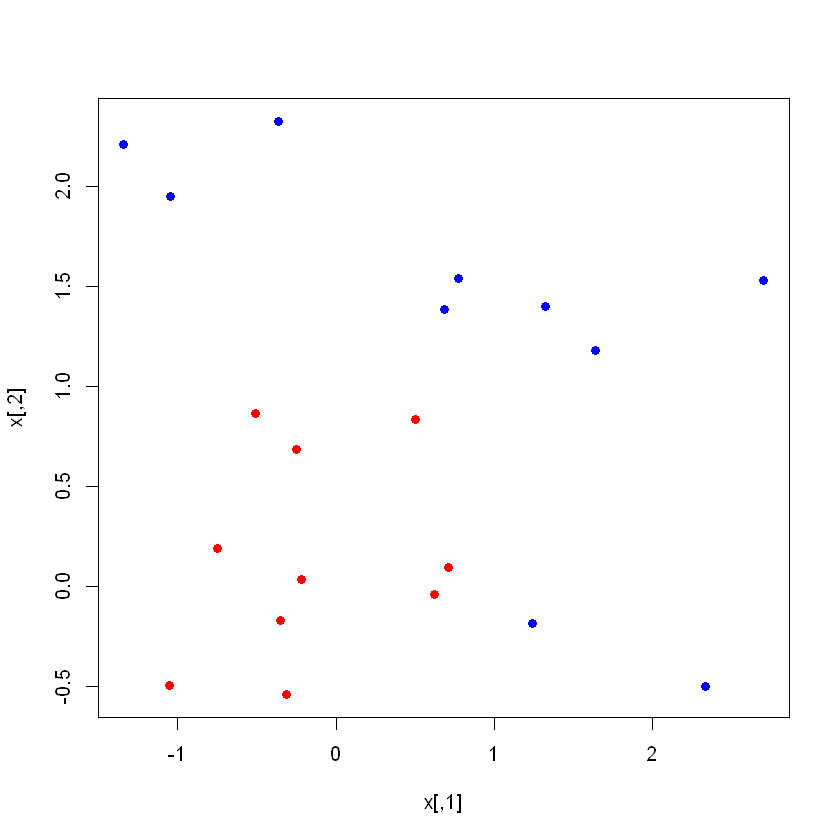

In [8]:
#Plot the data
plot(x, col = y + 3, pch = 19)

In [9]:
dat = data.frame(x, y = as.factor(y))

In [10]:
svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6



In [11]:
make.grid = function(x, n = 75) {
  grange = apply(x, 2, range)
  x1 = seq(from = grange[1,1], to = grange[2,1], length = n)
  x2 = seq(from = grange[1,2], to = grange[2,2], length = n)
  expand.grid(X1 = x1, X2 = x2)
}

In [12]:
xgrid = make.grid(x)
xgrid[1:10,]

X1,X2
-1.3406379,-0.5400074
-1.2859572,-0.5400074
-1.2312766,-0.5400074
-1.1765959,-0.5400074
-1.1219153,-0.5400074
-1.0672346,-0.5400074
-1.0125540,-0.5400074
-0.9578733,-0.5400074
-0.9031927,-0.5400074
-0.8485120,-0.5400074


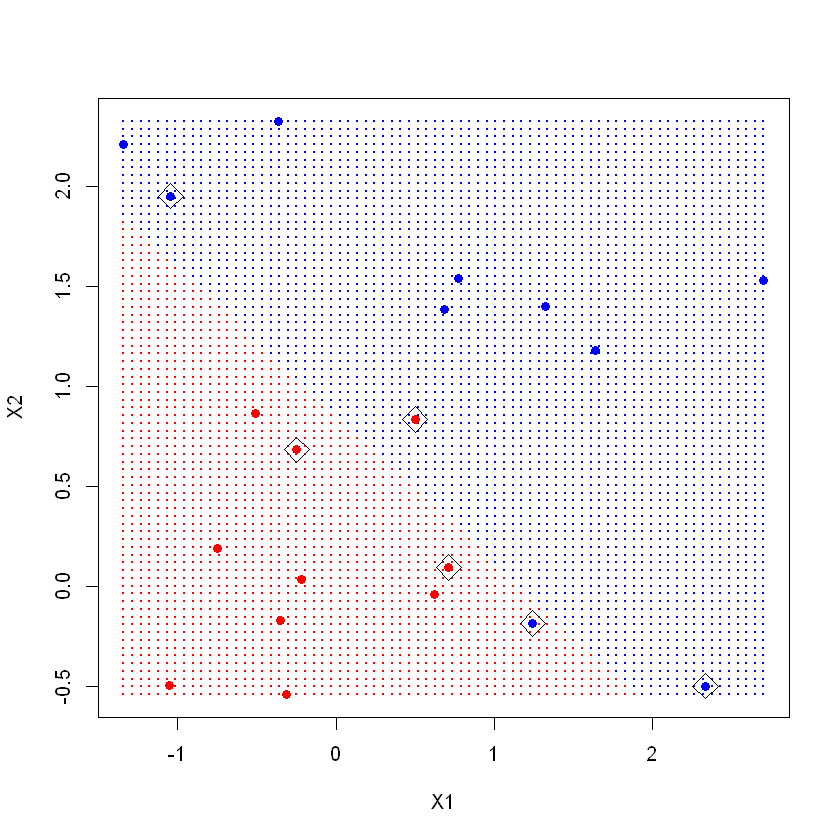

In [13]:
ygrid = predict(svmfit, xgrid)
plot(xgrid, col = c("red","blue")[as.numeric(ygrid)], pch = 20, cex = .2) #coerce vectors explicitly
points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)

In [14]:
beta = drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0 = svmfit$rho

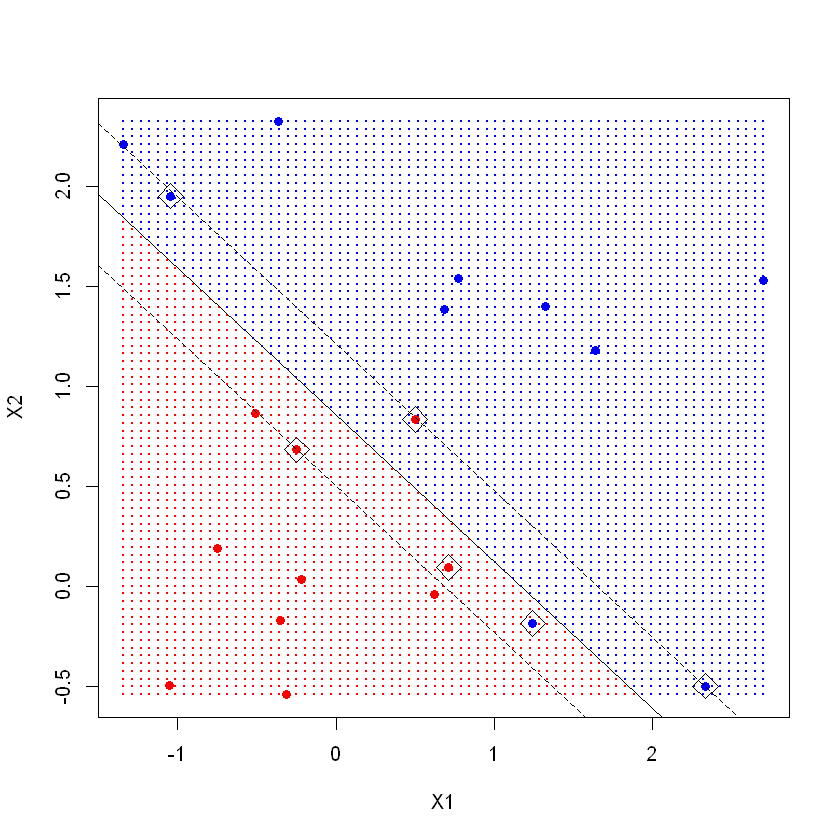

In [15]:
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)], pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)
abline(beta0 / beta[2], -beta[1] / beta[2])
abline((beta0 - 1) / beta[2], -beta[1] / beta[2], lty = 2)
abline((beta0 + 1) / beta[2], -beta[1] / beta[2], lty = 2)